In [20]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# import dataset

# read training dataset, and assign to variable 'train_df'
train_df = pd.read_csv('train.csv')

# read test dataset, and assign to variable 'test_df'
test_df = pd.read_csv('test.csv')

# create a list containing train_df and test_df
combine = [train_df, test_df]

In [24]:
# check the datatype of variable 'combine'
type(combine)

list

In [26]:
# python starts from 0, so the 0-th element in 'combine' is train_df, and it has 891 rows and 12 columns
combine[0].shape

(891, 12)

In [28]:
# print out all of the column names
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [30]:
# previewing the first 5 rows
# remember that python starts from 0 instead of 1 (first row is the 0-th row)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# previewing the last 10 rows
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [34]:
# check if there are any NaN value within the dataframe
# 'True' means this datafram has NaN

print(train_df.isnull().values.any())
print(test_df.isnull().values.any())

True
True


In [36]:
# return rows where 'Age' is NaN
train_df[train_df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [38]:
# summary of training dataset
train_df.info()
print('_'*40)

# summary of testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [40]:
# data preprocessing
# return rows where 'Age' > 100
train_df[train_df.Age > 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# dataset.Name = dataset['Name']
# note that there is pattern in name
# it is title. name, e.g. Braund, Mr. Owen Harris
# The following code can extract the title based on the pattern
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [46]:
# data preprocessing
# create a dictionary for title and map the titles to corresponding numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} # nominal values
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping) # maps the title into numerical value
    dataset['Title'] = dataset['Title'].fillna(0) # filling NaN cells with 0

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [48]:
# it can be seen from above table, most of the 'Title' such as 'Lady' and 'Don' are rarely seen
# Titles such as 'Miss', 'Mr', 'Mrs' and 'Master' are common
# Thus, we replace those rarely seen title by 'Rare'
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', \
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms'], 'Rare')


# checking the survival rate by 'Title'
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0.0,0.444444
1,1.0,0.156673
2,2.0,0.697802
3,3.0,0.792000
4,4.0,0.575000


In [50]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [52]:
# summary of training dataset
# we notice that variables 'Age', 'Cabin', 'Embarked' are not 819
train_df.info()
print('_'*40)

# summary of test dataset
# we notice that variable 'Age', 'Cabin', 'Fare' are not 418 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------   

In [54]:
# data preprocessing 
# Mapping the sex into numerical number
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int) # try withou astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1.0


In [56]:
train_df.head(10)

# notice that row with index 5 has a NaN value in column 'Age'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,3.0


In [58]:
# creating a 2*3 matrix with all zeros by NumPy
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [60]:
# data preprocessing - median imputation for 'Age'

# there are lots of NaN value in 'Age' and we use median values to replace the NaN cell here
# the idea of the following code is, for each cell with NaN, we check its 'Sex' and 'Pclass', and
# we extract the 'Age' with same 'Sex' and 'Pclass' but have values. 
# then we use the median of those cells
# to replace the cells which have NaN values

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # convert random age float to nearest .5 age
            guess_ages[i, j] = int(age_guess)

    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


In [62]:
# summary of training dataset
train_df.info()
print('_'*40)
# summary of testing dataset
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------   

In [64]:
# recheck that row with index 5
# and you will find that it has a specific value in column 'Age'
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,1.0
5,6,0,3,"Moran, Mr. James",0,25,0,0,330877,8.4583,NaN,Q,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,S,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,S,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,C,3.0


In [66]:
# 'combine[0] is the training data'
# 'combine[1] is the testing data'
print("Before dropping these 3 variables, the shape becomes: ", combine[0].shape, combine[1].shape)

# dropping 3 variables
train_df = train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1) # axis=1 is along columns
test_df = test_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)  # axis=1 is along columns
combine = [train_df, test_df]

print("After dropping these 3 variables, the shape becomes: ", combine[0].shape, combine[1].shape)

Before dropping these 3 variables, the shape becomes:  (891, 13) (418, 12)
After dropping these 3 variables, the shape becomes:  (891, 10) (418, 9)


In [68]:
# exploratory data analysis
# summary statistics of training data
train_df.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.072952,0.523008,0.381594,32.204208,1.589226
std,0.486592,0.836071,0.477990,13.326339,1.102743,0.806057,49.693429,0.923876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,4.000000


<AxesSubplot:>

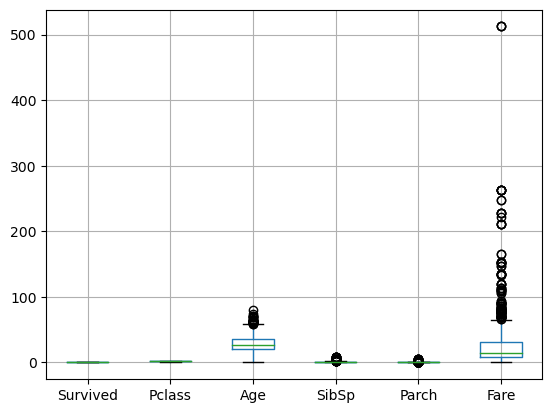

In [70]:
# exploratory data analysis
# pandas allows us to draw box plots directly
# numerical variables will be plotted if no variable is assigned (train_df.boxplot())

train_df.boxplot(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])


In [72]:
# exploratory data analysis
# check all categorical features: name, sex, cabin, embarked, ticket
# we need to convert those categorical features into numerical values
# so that the algorithm is able to work with them
train_df.describe(include=['O'])

,Name,Embarked
count,891,889
unique,891,3
top,"Braund, Mr. Owen Harris",S
freq,1,644


In [74]:
# exploratory data analysis
# checking training data with columns 'Pclass' and 'Survived', and group these 2 columns by 'Pclass'

# since the 'Survived' is binary, we can take the mean value to calculate its survive rate
# we further sort the resulted table in descending order by 'Survived'
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [76]:
# exploratory data analysis
# checking training data with columns 'Sex' and 'Survived', and group these 2 columns by 'Sex'

# since the 'Survived' is binary, we can take the mean value to calculate its survive rate
# we further sort the resulted table in descending order by 'Survived'
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [78]:
# exploratory data analysis
# checking training data with columns 'SibSp' and 'Survived', and group these 2 columns by 'SibSp'

# since the 'Survived' is binary, we can take the mean value to calculate its survive rate
# we further sort the resulted table in descending order by 'Survived'
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [102]:
# creating visualizations

# Pclass=3 had most passengers, however most did not survive
# infant passengers in Pclass=2 and Pclass=3 mostly survived
# most passengers in Pclass=1 survived

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)

# plotting the histogram by 'Ages'
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

# adding legend
grid.add_legend();

In [110]:
# female passengers had much better survival rate than males
# exception in Embarked=C where males had higher survival rate
# this could be a correlation between Pclass and EmCompleting (#2).
# barked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived
# Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports
# Ports of embarkation have varying survival rates for Pclass=3 and among male passengers

grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', hue_order=None, order=None)
grid.add_legend()

In [111]:
# creating new features called 'AgeBand'
# segmenting 'Age' into 5 equal spaced bins and finding which interval they belong to
# assign the interval to 'AgeBand'
train_df['AgeBand'] = pd.cut(train_df['Age'], 5, right=False)

# checking the survival rate by 'AgeBand'
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"[0.0, 16.0)",0.590361
1,"[16.0, 32.0)",0.331301
2,"[32.0, 48.0)",0.409692
3,"[48.0, 64.0)",0.473684
4,"[64.0, 80.08)",0.076923


In [112]:
# interval in 'AgeBand' is not convenient enough, we change the value in 'Age' to 0,1,2,3
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[dataset['Age'] > 16 & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[dataset['Age'] > 32 & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[dataset['Age'] > 48 & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,3,1,0,7.2500,S,1.0,"[16.0, 32.0)"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,71.2833,C,3.0,"[32.0, 48.0)"
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7.9250,S,2.0,"[16.0, 32.0)"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,53.1000,S,3.0,"[32.0, 48.0)"
4,0,3,"Allen, Mr. William Henry",0,3,0,0,8.0500,S,1.0,"[32.0, 48.0)"


In [116]:
set(train_df['Age'])

{0, 3}

In [118]:
# dropping 'AgeBand' in the dataset
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,3,1,0,7.2500,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,71.2833,C,3.0
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7.9250,S,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,53.1000,S,3.0
4,0,3,"Allen, Mr. William Henry",0,3,0,0,8.0500,S,1.0


In [120]:
# family size maybe another factor that affect survival rate
# thus we add the 'SibSp' and 'Parch' together plus 1 (himself or herself)
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Checking the survival rate by 'FamilySize'
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [122]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1) # axis=0 along the rows, and axis=1 along the columns
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,3,7.2500,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,71.2833,C,3.0
2,1,3,"Heikkinen, Miss. Laina",1,3,7.9250,S,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,53.1000,S,3.0
4,0,3,"Allen, Mr. William Henry",0,3,8.0500,S,1.0


In [124]:
# create new variable 'Age*Class' for both training and testing data
# in this way we are able to combine these 2
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,9,3,3
1,3,3,1
2,9,3,3
3,3,3,1
4,9,3,3
5,9,3,3
6,3,3,1
7,0,0,3
8,9,3,3
9,0,0,2


In [126]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()


,Pclass,Name,Sex,Age,Fare,Embarked,Title,Age*Class
0,3,"Kelly, Mr. James",0,3,7.8292,Q,1.0,9
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,7.0000,S,3.0,9
2,2,"Myles, Mr. Thomas Francis",0,3,9.6875,Q,1.0,6
3,3,"Wirz, Mr. Albert",0,3,8.6625,S,1.0,9
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,12.2875,S,3.0,9


In [128]:
# segment the 'FareBand' into 4 quantiles, [0, 0.25, 0.5, 0.75, 1]
train_df['FareBand'] = pd.qcut(train_df['Fare'],4) 
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [130]:
# transforming the 'Fare' into numerical value like 0,1,2,3, and make them as integer
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

# dropping the 'FareBand', and reassign the total list to 'combine'
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Age*Class
0,0,3,"Braund, Mr. Owen Harris",0,3,0,S,1.0,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,3,C,3.0,3
2,1,3,"Heikkinen, Miss. Laina",1,3,1,S,2.0,9
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,3,S,3.0,3
4,0,3,"Allen, Mr. William Henry",0,3,1,S,1.0,9
5,0,3,"Moran, Mr. James",0,3,1,Q,1.0,9
6,0,1,"McCarthy, Mr. Timothy J",0,3,3,S,1.0,3
7,0,3,"Palsson, Master. Gosta Leonard",0,0,2,S,4.0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,1,S,3.0,9
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,2,C,3.0,0


In [132]:
#Saving the dataframe to the current working directory

train_df.to_csv('train_after_preprocessing.csv')
test_df.to_csv('test_after_preprocessing.csv')